In [5]:
import numpy as np
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt

In [9]:
signal = lambda t: np.cos(2*np.pi*t*50) + np.cos(2*np.pi*t*150) + np.cos(2*np.pi*t*450)

In [26]:
N = 1000 # Количество отсчетов
fmax = 10000 # максимальная частота
T = 1.0/fmax

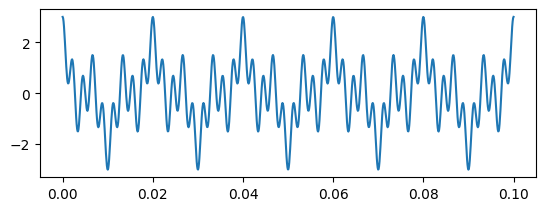

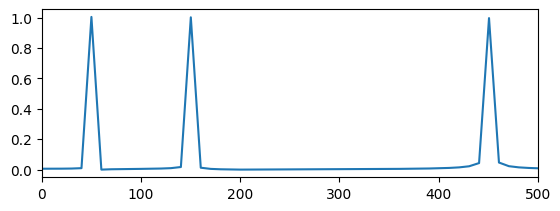

In [27]:
def task1():
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    
    plt.subplot(211)
    plt.plot(x, y)
    plt.show()
    
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = fft(y)
    
    plt.subplot(212)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlim(0, 500)
    plt.show()
    
task1()

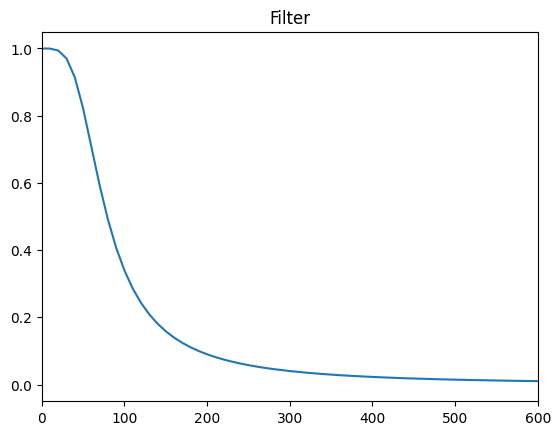

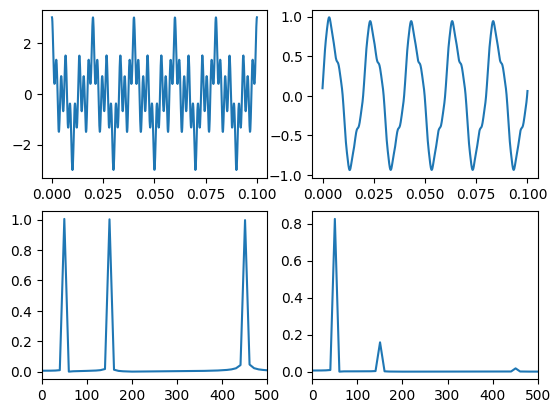

In [38]:
def task2():
    w_c = 60
    
    def sig_filter(w):
        omega = w/w_c
        return  1 / (-(omega**2) + 1j*np.sqrt(2)*omega + 1)
    
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = fft(y)
    y_filtered = np.zeros_like(yf)
    for i in range(len(y_filtered)):
        y_filtered[i] = yf[i] * sig_filter(i * fmax/N)
    
    test_y = np.ones_like(x, dtype=complex)
    for i in range(len(test_y)):
        test_y[i] = test_y[i] * sig_filter(i * fmax/N)
    plt.plot(xf, np.abs(test_y[0:N//2]))
    plt.xlim(0, w_c*10)
    plt.title('Filter')
    plt.show()
    
    plt.subplot(223)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(224)
    plt.plot(xf, 2.0/N * np.abs(y_filtered[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(221)
    plt.plot(x, y)
    
    plt.subplot(222)
    plt.plot(x, 2.0 * np.real(ifft(y_filtered)))
    
    plt.show()
    
task2()

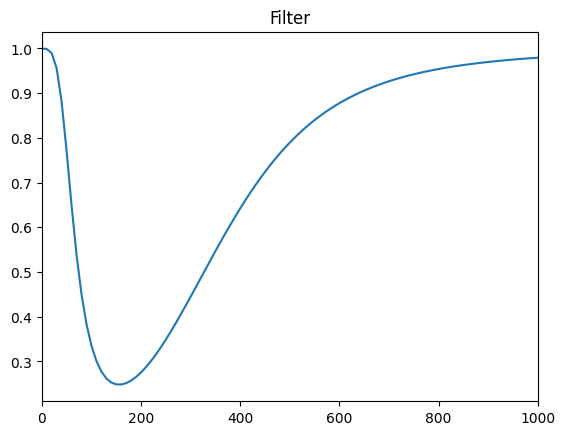

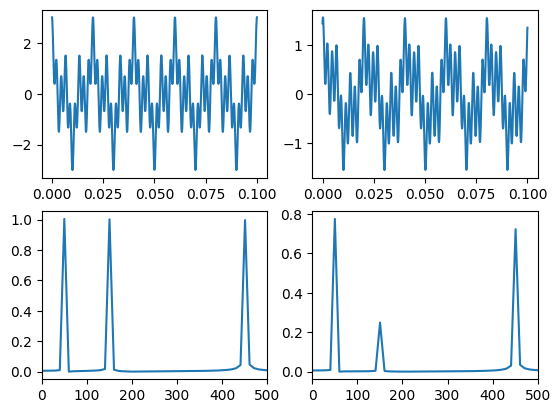

In [68]:
def task3():
    w_c0 = 55
    w_c1 = 440
    
    def sig_filter(w):
        omega0 = w/w_c0
        omega1 = w_c1/(w + 0.000001)
        return 1 / (-(omega0**2) + 1j*np.sqrt(2)*omega0 + 1) + 1 / (-(omega1**2) + 1j*np.sqrt(2)*omega1 + 1)
    
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = fft(y)
    y_filtered = np.zeros_like(yf)
    for i in range(len(y_filtered)):
        y_filtered[i] = yf[i] * sig_filter(i * fmax/N)
    
    test_y = np.ones_like(x, dtype=complex)
    for i in range(len(test_y)):
        test_y[i] = test_y[i] * sig_filter(i * fmax/N)
    plt.plot(xf, np.abs(test_y[0:N//2]))
    plt.xlim(0, 1000)
    plt.title('Filter')
    plt.show()
    
    plt.subplot(223)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(224)
    plt.plot(xf, 2.0/N * np.abs(y_filtered[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(221)
    plt.plot(x, y)
    
    plt.subplot(222)
    plt.plot(x, np.real(ifft(y_filtered)))
    
    plt.show()
    
task3()

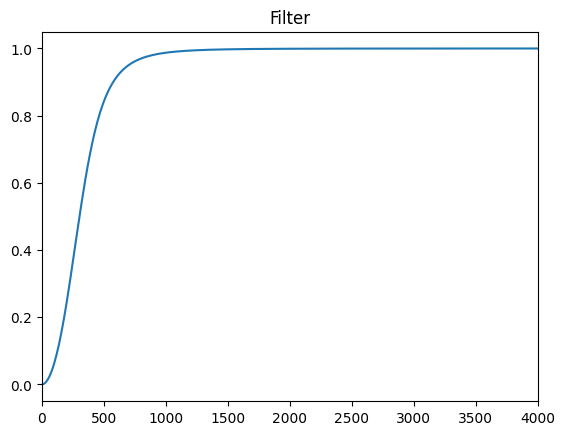

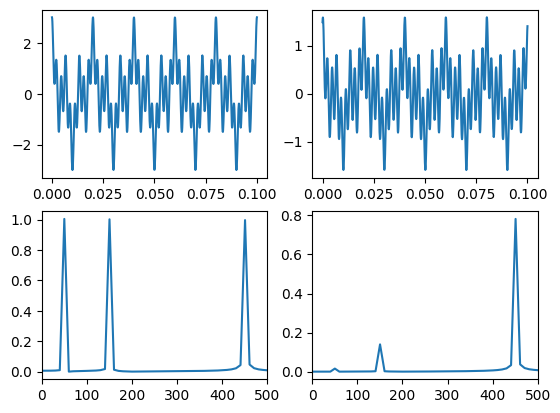

In [67]:
def task4():
    w_c = 400
    
    def sig_filter(w):
        omega = w_c/(w+0.000001)
        return  1 / (-(omega**2) + 1j*np.sqrt(2)*omega + 1)
    
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = fft(y)
    y_filtered = np.zeros_like(yf)
    for i in range(len(y_filtered)):
        y_filtered[i] = yf[i] * sig_filter(i * fmax/N)
    
    test_y = np.ones_like(x, dtype=complex)
    for i in range(len(test_y)):
        test_y[i] = test_y[i] * sig_filter(i * fmax/N)
    plt.plot(xf, np.abs(test_y[0:N//2]))
    plt.xlim(0, w_c*10)
    plt.title('Filter')
    plt.show()
    
    plt.subplot(223)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(224)
    plt.plot(xf, 2.0/N * np.abs(y_filtered[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(221)
    plt.plot(x, y)
    
    plt.subplot(222)
    plt.plot(x, np.real(ifft(y_filtered)))
    
    plt.show()
    
task4()

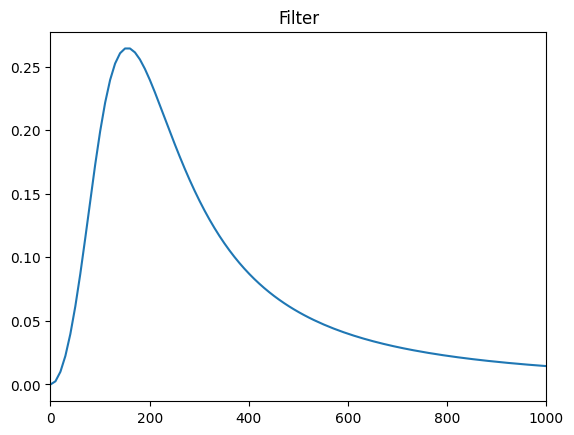

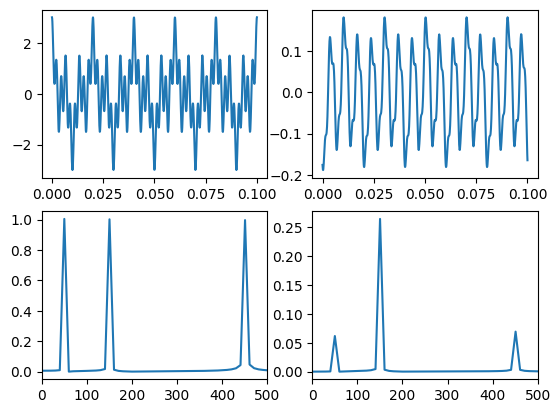

In [77]:
def task5():
    w_c0 = 120
    w_c1 = 200
    
    def sig_filter(w):
        omega0 = w/w_c0
        omega1 = w_c1/(w + 0.000001)
        return (1 / (-(omega0**2) + 1j*np.sqrt(2)*omega0 + 1)) * (1 / (-(omega1**2) + 1j*np.sqrt(2)*omega1 + 1))
    
    x = np.linspace(0.0, N*T, N)
    y = signal(x)
    
    xf = np.linspace(0.0, fmax/2, N//2)
    yf = fft(y)
    y_filtered = np.zeros_like(yf)
    for i in range(len(y_filtered)):
        y_filtered[i] = yf[i] * sig_filter(i * fmax/N)
    
    test_y = np.ones_like(x, dtype=complex)
    for i in range(len(test_y)):
        test_y[i] = test_y[i] * sig_filter(i * fmax/N)
    plt.plot(xf, np.abs(test_y[0:N//2]))
    plt.xlim(0, 1000)
    plt.title('Filter')
    plt.show()
    
    plt.subplot(223)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(224)
    plt.plot(xf, 2.0/N * np.abs(y_filtered[0:N//2]))
    plt.xlim(0, 500)
    
    plt.subplot(221)
    plt.plot(x, y)
    
    plt.subplot(222)
    plt.plot(x, np.real(ifft(y_filtered)))
    
    plt.show()
    
task5()

In [17]:
def filter_generator(n):
    neg_roots = list(filter(lambda x: x.real < 0, np.roots([(-1)**n] + [0] * (n*2-1) + [1])))
    print(neg_roots)
    def freq_filter(omega):
        
filter_generator(2)

[np.complex128(-0.7071067811865477+0.7071067811865476j), np.complex128(-0.7071067811865477-0.7071067811865476j)]
